In [82]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pylab import *
from scipy import stats
from sklearn import *
import plotly.express as px

In [15]:
df=pd.read_csv('Unemployment_Rate_upto_11_2020.csv')

In [28]:
df

,Reg,EUR,EE,ELPR,R1,long,lat
0,Andhra Pradesh,5.48,16635535,41.02,South,15.9129,79.740
1,Andhra Pradesh,5.83,16545652,40.90,South,15.9129,79.740
2,Andhra Pradesh,5.79,15881197,39.18,South,15.9129,79.740
3,Andhra Pradesh,20.51,11336911,33.10,South,15.9129,79.740
4,Andhra Pradesh,17.43,12988845,36.46,South,15.9129,79.740
...,...,...,...,...,...,...,...
262,West Bengal,7.29,30726310,40.39,East,22.9868,87.855
263,West Bengal,6.83,35372506,46.17,East,22.9868,87.855
264,West Bengal,14.87,33298644,47.48,East,22.9868,87.855
265,West Bengal,9.35,35707239,47.73,East,22.9868,87.855


In [4]:
df.columns

Index(['Region', ' Date', ' Frequency', ' Estimated Unemployment Rate (%)',
       ' Estimated Employed', ' Estimated Labour Participation Rate (%)',
       'Region.1', 'longitude', 'latitude'],
      dtype='object')

In [5]:
df.head(10)

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region.1,longitude,latitude
0,Andhra Pradesh,31-01-2020,M,5.48,16635535,41.02,South,15.9129,79.74
1,Andhra Pradesh,29-02-2020,M,5.83,16545652,40.90,South,15.9129,79.74
2,Andhra Pradesh,31-03-2020,M,5.79,15881197,39.18,South,15.9129,79.74
3,Andhra Pradesh,30-04-2020,M,20.51,11336911,33.10,South,15.9129,79.74
4,Andhra Pradesh,31-05-2020,M,17.43,12988845,36.46,South,15.9129,79.74
5,Andhra Pradesh,30-06-2020,M,3.31,19805400,47.41,South,15.9129,79.74
6,Andhra Pradesh,31-07-2020,M,8.34,15431615,38.91,South,15.9129,79.74
7,Andhra Pradesh,31-08-2020,M,6.96,15251776,37.83,South,15.9129,79.74
8,Andhra Pradesh,30-09-2020,M,6.40,15220312,37.47,South,15.9129,79.74
9,Andhra Pradesh,31-10-2020,M,6.59,15157557,37.34,South,15.9129,79.74


In [6]:
df['Region'].unique()

array(['Andhra Pradesh', 'Assam', 'Bihar', 'Chhattisgarh', 'Delhi', 'Goa',
       'Gujarat', 'Haryana', 'Himachal Pradesh', 'Jammu & Kashmir',
       'Jharkhand', 'Karnataka', 'Kerala', 'Madhya Pradesh',
       'Maharashtra', 'Meghalaya', 'Odisha', 'Puducherry', 'Punjab',
       'Rajasthan', 'Sikkim', 'Tamil Nadu', 'Telangana', 'Tripura',
       'Uttar Pradesh', 'Uttarakhand', 'West Bengal'], dtype=object)

In [7]:
df.tail()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region.1,longitude,latitude
262,West Bengal,30-06-2020,M,7.29,30726310,40.39,East,22.9868,87.855
263,West Bengal,31-07-2020,M,6.83,35372506,46.17,East,22.9868,87.855
264,West Bengal,31-08-2020,M,14.87,33298644,47.48,East,22.9868,87.855
265,West Bengal,30-09-2020,M,9.35,35707239,47.73,East,22.9868,87.855
266,West Bengal,31-10-2020,M,9.98,33962549,45.63,East,22.9868,87.855


In [10]:
df.isnull().sum()
df.dropna()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region.1,longitude,latitude
0,Andhra Pradesh,31-01-2020,M,5.48,16635535,41.02,South,15.9129,79.740
1,Andhra Pradesh,29-02-2020,M,5.83,16545652,40.90,South,15.9129,79.740
2,Andhra Pradesh,31-03-2020,M,5.79,15881197,39.18,South,15.9129,79.740
3,Andhra Pradesh,30-04-2020,M,20.51,11336911,33.10,South,15.9129,79.740
4,Andhra Pradesh,31-05-2020,M,17.43,12988845,36.46,South,15.9129,79.740
...,...,...,...,...,...,...,...,...,...
262,West Bengal,30-06-2020,M,7.29,30726310,40.39,East,22.9868,87.855
263,West Bengal,31-07-2020,M,6.83,35372506,46.17,East,22.9868,87.855
264,West Bengal,31-08-2020,M,14.87,33298644,47.48,East,22.9868,87.855
265,West Bengal,30-09-2020,M,9.35,35707239,47.73,East,22.9868,87.855


In [17]:

df.columns




Index(['Region', ' Date', ' Frequency', ' Estimated Unemployment Rate (%)',
       ' Estimated Employed', ' Estimated Labour Participation Rate (%)',
       'Region.1', 'longitude', 'latitude'],
      dtype='object')

In [18]:
new_column_names = {'Region':'Reg', ' Date': 'Date',  ' Frequency': 'Fre',' Estimated Unemployment Rate (%)':
                   'EUR',' Estimated Employed':'EE',' Estimated Labour Participation Rate (%)':'ELPR','Region.1':'R1',
                       'longitude':'long', 'latitude':'lat'}
        
df.rename(columns=new_column_names, inplace=True)

In [19]:
df

,Reg,Date,Fre,EUR,EE,ELPR,R1,long,lat
0,Andhra Pradesh,31-01-2020,M,5.48,16635535,41.02,South,15.9129,79.740
1,Andhra Pradesh,29-02-2020,M,5.83,16545652,40.90,South,15.9129,79.740
2,Andhra Pradesh,31-03-2020,M,5.79,15881197,39.18,South,15.9129,79.740
3,Andhra Pradesh,30-04-2020,M,20.51,11336911,33.10,South,15.9129,79.740
4,Andhra Pradesh,31-05-2020,M,17.43,12988845,36.46,South,15.9129,79.740
...,...,...,...,...,...,...,...,...,...
262,West Bengal,30-06-2020,M,7.29,30726310,40.39,East,22.9868,87.855
263,West Bengal,31-07-2020,M,6.83,35372506,46.17,East,22.9868,87.855
264,West Bengal,31-08-2020,M,14.87,33298644,47.48,East,22.9868,87.855
265,West Bengal,30-09-2020,M,9.35,35707239,47.73,East,22.9868,87.855


In [20]:
df.drop('Date',axis=1,inplace=True)

In [21]:
df

,Reg,Fre,EUR,EE,ELPR,R1,long,lat
0,Andhra Pradesh,M,5.48,16635535,41.02,South,15.9129,79.740
1,Andhra Pradesh,M,5.83,16545652,40.90,South,15.9129,79.740
2,Andhra Pradesh,M,5.79,15881197,39.18,South,15.9129,79.740
3,Andhra Pradesh,M,20.51,11336911,33.10,South,15.9129,79.740
4,Andhra Pradesh,M,17.43,12988845,36.46,South,15.9129,79.740
...,...,...,...,...,...,...,...,...
262,West Bengal,M,7.29,30726310,40.39,East,22.9868,87.855
263,West Bengal,M,6.83,35372506,46.17,East,22.9868,87.855
264,West Bengal,M,14.87,33298644,47.48,East,22.9868,87.855
265,West Bengal,M,9.35,35707239,47.73,East,22.9868,87.855


In [22]:
df['Fre'].unique()

array([' M'], dtype=object)

In [29]:
df

,Reg,EUR,EE,ELPR,R1,long,lat
0,Andhra Pradesh,5.48,16635535,41.02,South,15.9129,79.740
1,Andhra Pradesh,5.83,16545652,40.90,South,15.9129,79.740
2,Andhra Pradesh,5.79,15881197,39.18,South,15.9129,79.740
3,Andhra Pradesh,20.51,11336911,33.10,South,15.9129,79.740
4,Andhra Pradesh,17.43,12988845,36.46,South,15.9129,79.740
...,...,...,...,...,...,...,...
262,West Bengal,7.29,30726310,40.39,East,22.9868,87.855
263,West Bengal,6.83,35372506,46.17,East,22.9868,87.855
264,West Bengal,14.87,33298644,47.48,East,22.9868,87.855
265,West Bengal,9.35,35707239,47.73,East,22.9868,87.855


In [32]:
df['R1'].unique()

array(['South', 'Northeast', 'East', 'West', 'North'], dtype=object)

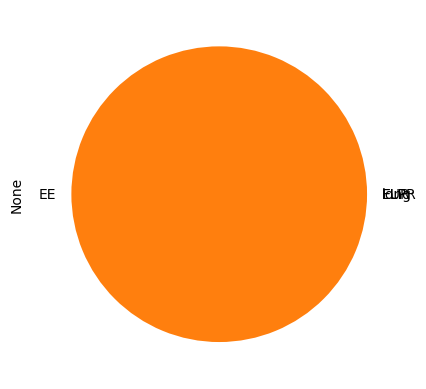

In [38]:
df[['EUR', 'EE', 'ELPR','long',]].sum().plot(kind='pie')
plt.show()

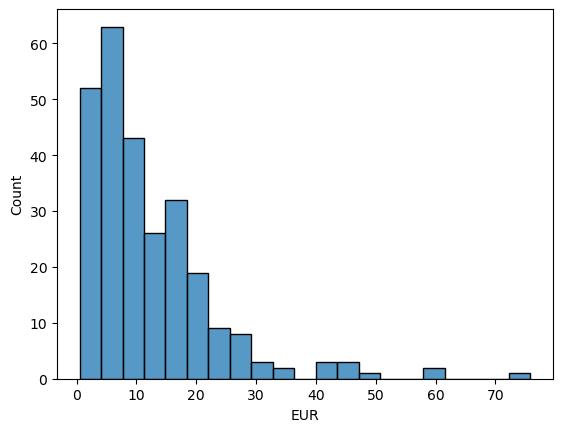

In [39]:
sns.histplot(data=df, x='EUR')
plt.show()

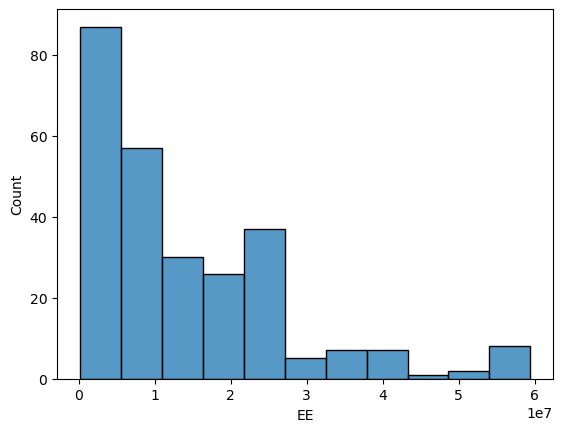

In [41]:
sns.histplot(data=df, x='EE')
plt.show()

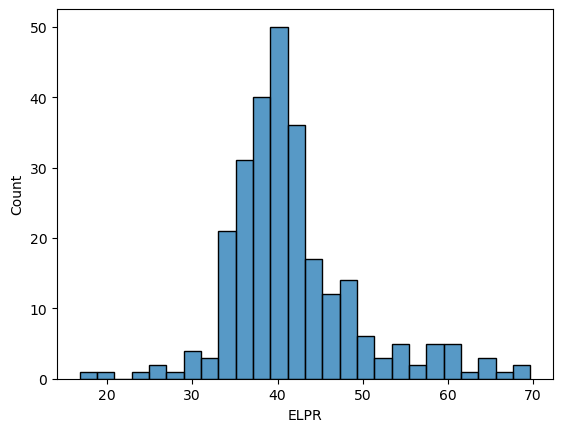

In [42]:
sns.histplot(data=df, x='ELPR')
plt.show()

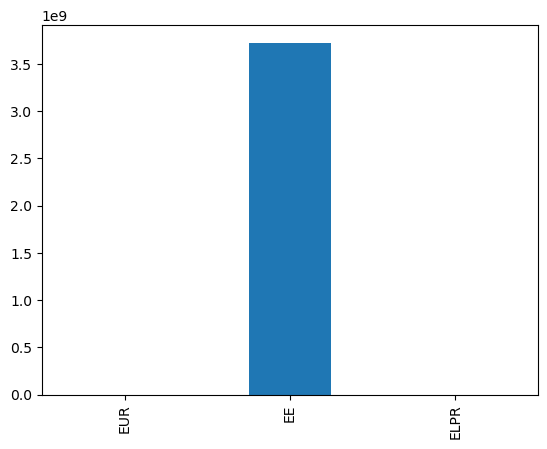

In [48]:
df[['EUR','EE','ELPR',]].sum().plot(kind='bar')
plt.show()

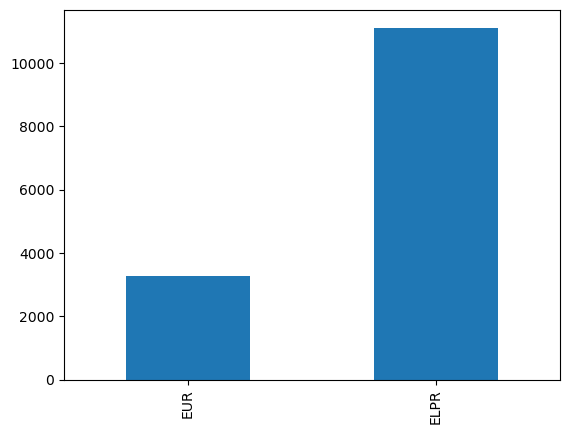

In [50]:
df[['EUR','ELPR',]].sum().plot(kind='bar')
plt.show()

In [51]:
df.corr()

,EUR,EE,ELPR,long,lat
EUR,1.000000,-0.245176,-0.073540,0.149976,-0.023976
EE,-0.245176,1.000000,-0.047948,-0.113664,-0.119321
ELPR,-0.073540,-0.047948,1.000000,0.080372,0.397836
long,0.149976,-0.113664,0.080372,1.000000,0.125895
lat,-0.023976,-0.119321,0.397836,0.125895,1.000000


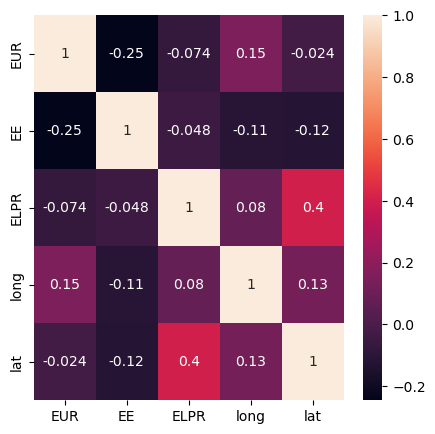

In [52]:
co=df.corr()
fig,ax=plt.subplots(figsize=(5,5))
sns.heatmap(co,annot=True,ax=ax)
plt.show()

In [53]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Reg']=le.fit_transform(df['Reg'])
df

,Reg,EUR,EE,ELPR,R1,long,lat
0,0,5.48,16635535,41.02,South,15.9129,79.740
1,0,5.83,16545652,40.90,South,15.9129,79.740
2,0,5.79,15881197,39.18,South,15.9129,79.740
3,0,20.51,11336911,33.10,South,15.9129,79.740
4,0,17.43,12988845,36.46,South,15.9129,79.740
...,...,...,...,...,...,...,...
262,26,7.29,30726310,40.39,East,22.9868,87.855
263,26,6.83,35372506,46.17,East,22.9868,87.855
264,26,14.87,33298644,47.48,East,22.9868,87.855
265,26,9.35,35707239,47.73,East,22.9868,87.855


In [67]:
from sklearn.model_selection import train_test_split
X=df.drop(columns=['Reg'])
Y=df['Reg']
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.5)

In [59]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()

In [58]:
df.drop('R1',axis=1,inplace=True)

In [61]:
model.fit(x_train,y_train)

C:\Users\rajar\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [68]:
print('Accuracy',model.score(x_test,y_test)*100)

Accuracy 4.477611940298507


In [69]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier()

In [70]:
model.fit(x_train,y_train)

KNeighborsClassifier()

In [71]:
print('Accuracy',model.score(x_test,y_test)*100)

Accuracy 54.47761194029851


C:\Users\rajar\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [72]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()



In [73]:
model.fit(x_train,y_train)

DecisionTreeClassifier()

In [74]:
print('Accuracy',model.score(x_test,y_test)*100)

Accuracy 97.76119402985076


Text(0, 0.5, 'Values')

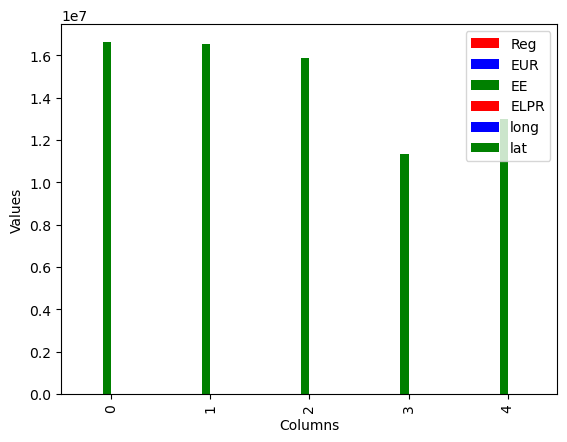

In [81]:
df.head().plot(kind='bar', color=['red', 'blue', 'green'])
plt.xlabel('Columns')
plt.ylabel('Values')

<function matplotlib.pyplot.show(close=None, block=None)>

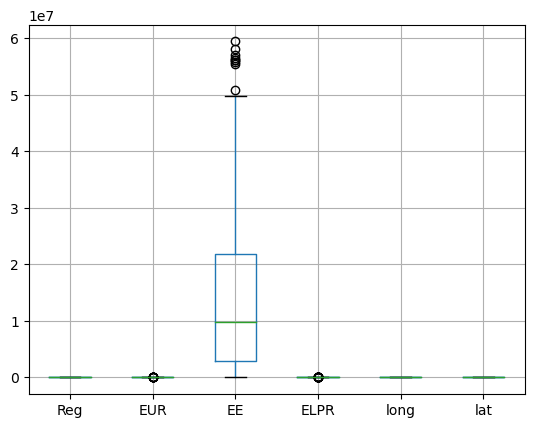

In [84]:
df.boxplot()
plt.show

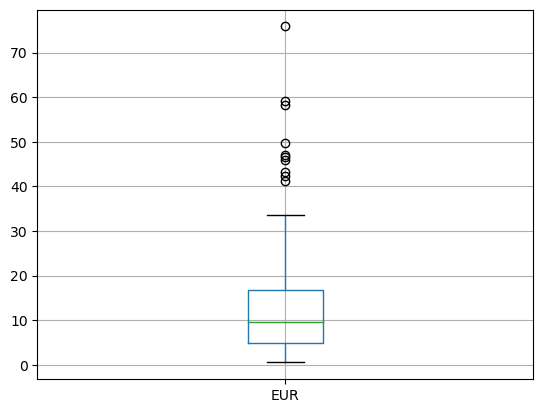

In [85]:
df.boxplot('EUR')
plt.show()

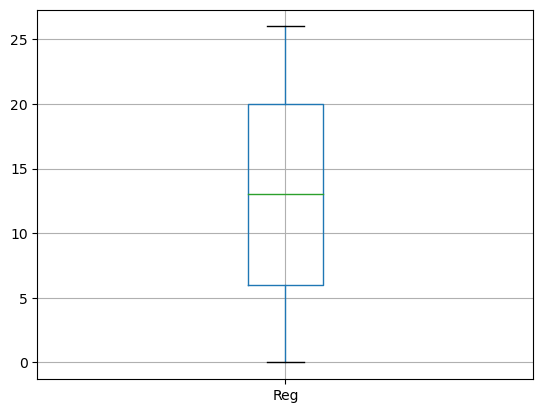

In [86]:
df.boxplot('Reg')
plt.show()